In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

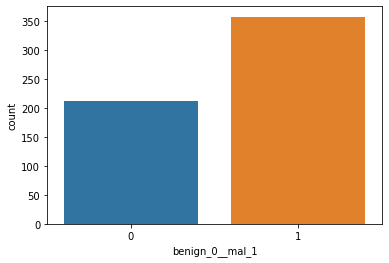

In [10]:
sns.countplot(x='benign_0__mal_1', data =df)

<AxesSubplot:>

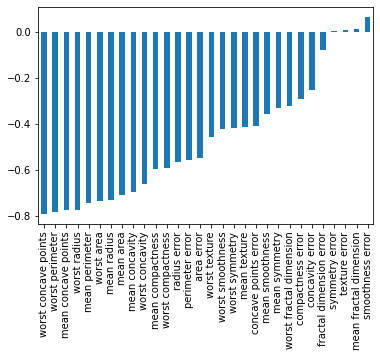

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

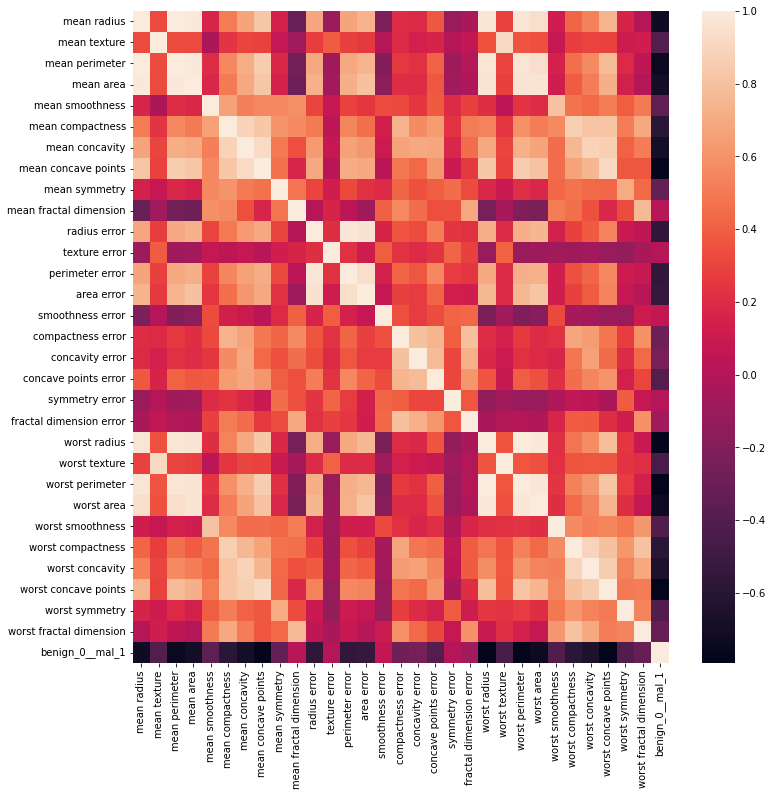

In [15]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1', axis =1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [26]:
X_train.shape

(426, 30)

In [27]:
model = Sequential()

model.add(Dense(30, activation ='relu'))

model.add(Dense(15, activation ='relu'))

model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
model.fit(x=X_train, y=y_train,
         epochs = 600,
         validation_data =(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6469 - val_loss: 0.6151
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5910 - val_loss: 0.5604
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5382 - val_loss: 0.5029
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4820 - val_loss: 0.4444
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4293 - val_loss: 0.3924
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3824 - val_loss: 0.3447
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3406 - val_loss: 0.3035
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3065 - val_loss: 0.2700
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2797 - val_loss: 0.2491
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2630 - val_loss: 0.2224
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.1059
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.1020
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0468 - val_loss: 0.1087
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.1051
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.1033
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.1069
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.1015
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0482 - val_loss: 0.1099
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.1059
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.1118
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.1240
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.1106
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.1244
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.1146
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1218
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1149
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1225
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0308 - val_loss: 0.1177
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1156
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.1169
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1200
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.1351
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.1079
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.1337
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.1108
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.1170
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1051
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.1433
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.1066
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.1171
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.1054
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.1346
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.1122
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.1302
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.1058
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.1251
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.1104
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.1167
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.1208
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.1475
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.1359
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.1219
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1385
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.1266
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.1306
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.1464
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.1374
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.1403
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.1277
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.1441
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.1551
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.1666
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.1481
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.1661
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.1456
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.1710
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.1632
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.1541
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.1597
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.1659
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.1824
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.1807
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.1988
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.1864
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.1735
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1836
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1743
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.1926
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.1680
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.1849
Epoc

In [29]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

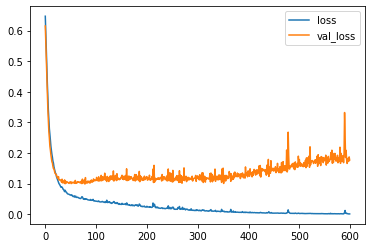

In [30]:
losses.plot()

In [31]:
#nouveau model, ajout du early stopping
model = Sequential()

model.add(Dense(30, activation ='relu'))

model.add(Dense(15, activation ='relu'))

model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode ='min', verbose=1, patience = 25)

In [34]:
model.fit(x=X_train, y=y_train,
         epochs = 600,
         validation_data =(X_test,y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6990 - val_loss: 0.6781
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6602 - val_loss: 0.6388
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6187 - val_loss: 0.5912
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5701 - val_loss: 0.5297
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5068 - val_loss: 0.4719
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4522 - val_loss: 0.4140
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3999 - val_loss: 0.3626
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3531 - val_loss: 0.3167
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3153 - val_loss: 0.2805
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2819 - val_loss: 0.2527
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.1120
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.1115
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.1135
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0543 - val_loss: 0.1105
Epoch 86: early stopping


<AxesSubplot:>

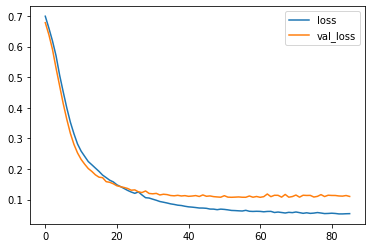

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [36]:
#nouveau model, ajout du dropout
model = Sequential()

model.add(Dense(30, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
model.fit(x=X_train, y=y_train,
         epochs = 600,
         validation_data =(X_test,y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.7105 - val_loss: 0.6871
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6863 - val_loss: 0.6672
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6766 - val_loss: 0.6508
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6582 - val_loss: 0.6376
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6495 - val_loss: 0.6237
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6347 - val_loss: 0.6104
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.5920
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6059 - val_loss: 0.5725
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5872 - val_loss: 0.5490
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5702 - val_loss: 0.5221
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 0.1250
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1367 - val_loss: 0.1190
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1149 - val_loss: 0.1177
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1291 - val_loss: 0.1279
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.1247
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1388 - val_loss: 0.1184
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1086 - val_loss: 0.1202
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1311 - val_loss: 0.1215
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1251 - val_loss: 0.1186
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1205 - val_loss: 0.1243
Epoch 93/600


<AxesSubplot:>

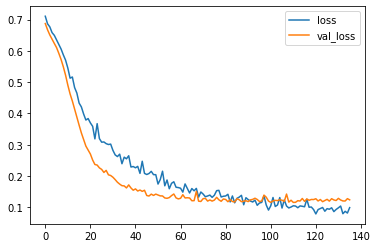

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
predictions = np.argmax(model.predict(X_test), axis=1)

5/5 [==============================] - 0s 1ms/step


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



C:\Users\pc\anaconda3\envs\my_rl_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\envs\my_rl_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\envs\my_rl_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(confusion_matrix(y_test, predictions))

[[55  0]
 [88  0]]
